# Instalando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
import plotly as px
import glob
import os

# Instalando os dados

In [3]:
dados_amsterdam1 = r'C:\Users\walle\OneDrive\Área de Trabalho\Projetos DataScience\Projeto Preços Airbnb cidades europeias\dados\dados_weekdays\amsterdam_weekdays.csv'
df_amsterdam1 = pd.read_csv(dados_amsterdam1,sep=',')
df_amsterdam1.head()


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [4]:
dados_athenas1 = r'C:\Users\walle\OneDrive\Área de Trabalho\Projetos DataScience\Projeto Preços Airbnb cidades europeias\dados\dados_weekdays\athens_weekdays.csv'
df_athenas1 = pd.read_csv(dados_athenas1,sep=',')
df_athenas1.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,129.824479,Entire home/apt,False,False,4.0,False,0,0,10.0,100.0,2,2.813964,0.881890,55.348572,2.086871,78.778377,5.915160,23.76600,37.98300
1,1,138.963748,Entire home/apt,False,False,4.0,True,1,0,10.0,96.0,1,0.407293,0.304568,240.306654,9.060559,407.167696,30.572629,23.73168,37.97776
2,2,156.304923,Entire home/apt,False,False,3.0,True,0,1,10.0,98.0,1,1.237211,0.288488,199.507366,7.522257,395.967403,29.731642,23.72200,37.97900
3,3,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,1,4.367457,0.297467,39.803047,1.500740,58.706578,4.408047,23.72712,38.01435
4,4,74.051508,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.194185,0.385266,78.733405,2.968577,113.325973,8.509204,23.73391,37.99529


In [5]:
df_amsterdam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [6]:
df_athenas1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2653 non-null   int64  
 1   realSum                     2653 non-null   float64
 2   room_type                   2653 non-null   object 
 3   room_shared                 2653 non-null   bool   
 4   room_private                2653 non-null   bool   
 5   person_capacity             2653 non-null   float64
 6   host_is_superhost           2653 non-null   bool   
 7   multi                       2653 non-null   int64  
 8   biz                         2653 non-null   int64  
 9   cleanliness_rating          2653 non-null   float64
 10  guest_satisfaction_overall  2653 non-null   float64
 11  bedrooms                    2653 non-null   int64  
 12  dist                        2653 non-null   float64
 13  metro_dist                  2653 

Chequei os DFs para garantir que eles possuem a mesma quantidade de colunas para a criação de um df com todos os dados diarios/fim de semana 

## Criando um DF com todos os dados diarios

In [7]:
# caminho com todos os arquivos diarios
pasta = r'C:\Users\walle\OneDrive\Área de Trabalho\Projetos DataScience\Projeto Preços Airbnb cidades europeias\dados\dados_weekdays'
arquivos_diarios = glob.glob(os.path.join(pasta,'*.csv')) 

# Lista para armazenar o DF

dfd = []

for arquivo in arquivos_diarios:
    df = pd.read_csv(arquivo)

    # Adciona coluna com nome da cidade/arquivo

    df['origem'] = os.path.basename(arquivo).replace('.csv', '')
    dfd.append(df)

# mesclando todos

df_dados_diarios = pd.concat(dfd, ignore_index=True) 

df_dados_diarios.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,origem
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays


In [8]:
df_dados_diarios['origem'].unique()

array(['amsterdam_weekdays', 'athens_weekdays', 'barcelona_weekdays',
       'berlin_weekdays', 'budapest_weekdays', 'lisbon_weekdays',
       'london_weekdays', 'paris_weekdays', 'rome_weekdays',
       'vienna_weekdays'], dtype=object)

## Criando um DF com todos os dados de fim de semana

In [9]:
pasta = r'C:\Users\walle\OneDrive\Área de Trabalho\Projetos DataScience\Projeto Preços Airbnb cidades europeias\dados\dados_weekends'
arquivos_diarios = glob.glob(os.path.join(pasta,'*.csv')) 

dfd = []

for arquivo in arquivos_diarios:
    df = pd.read_csv(arquivo)
    df['origem'] = os.path.basename(arquivo).replace('.csv', '')
    dfd.append(df)

df_dados_FimDeSemana = pd.concat(dfd, ignore_index=True) 

df_dados_FimDeSemana.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,origem
0,0,319.640053,Private room,False,True,2.0,False,0,1,9.0,...,1,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137,amsterdam_weekends
1,1,347.995219,Private room,False,True,2.0,False,0,1,9.0,...,1,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103,amsterdam_weekends
2,2,482.975183,Private room,False,True,4.0,False,0,1,9.0,...,2,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663,amsterdam_weekends
3,3,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508,amsterdam_weekends
4,4,2771.541724,Entire home/apt,False,False,4.0,True,0,0,10.0,...,3,1.686798,1.458399,208.809162,11.055489,272.315202,23.739349,4.88467,52.38749,amsterdam_weekends


# Analise exploratoria dos dados

In [10]:
df_dados_diarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  25500 non-null  int64  
 1   realSum                     25500 non-null  float64
 2   room_type                   25500 non-null  object 
 3   room_shared                 25500 non-null  bool   
 4   room_private                25500 non-null  bool   
 5   person_capacity             25500 non-null  float64
 6   host_is_superhost           25500 non-null  bool   
 7   multi                       25500 non-null  int64  
 8   biz                         25500 non-null  int64  
 9   cleanliness_rating          25500 non-null  float64
 10  guest_satisfaction_overall  25500 non-null  float64
 11  bedrooms                    25500 non-null  int64  
 12  dist                        25500 non-null  float64
 13  metro_dist                  255

In [11]:
df_dados_FimDeSemana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26207 entries, 0 to 26206
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  26207 non-null  int64  
 1   realSum                     26207 non-null  float64
 2   room_type                   26207 non-null  object 
 3   room_shared                 26207 non-null  bool   
 4   room_private                26207 non-null  bool   
 5   person_capacity             26207 non-null  float64
 6   host_is_superhost           26207 non-null  bool   
 7   multi                       26207 non-null  int64  
 8   biz                         26207 non-null  int64  
 9   cleanliness_rating          26207 non-null  float64
 10  guest_satisfaction_overall  26207 non-null  float64
 11  bedrooms                    26207 non-null  int64  
 12  dist                        26207 non-null  float64
 13  metro_dist                  262

In [12]:
df_dados_diarios.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,1549.896627,275.681904,3.175529,0.293529,0.358745,9.389176,92.586549,1.165725,3.160597,0.680994,293.734519,13.265403,625.004708,23.499036,7.594875,45.568793
std,1137.783204,354.279644,1.308675,0.455388,0.479642,0.954920,8.964563,0.634562,2.385645,0.849603,223.797459,9.699020,500.614980,17.745870,9.827575,5.252706
min,0.000000,37.129295,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015059,0.003944,15.532918,0.926301,21.455803,0.667010,-9.226340,37.953000
25%,637.000000,145.168856,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.433281,0.250707,135.310097,6.305256,246.196343,9.829716,-0.065040,41.393000
50%,1295.000000,207.148849,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.591957,0.415916,234.030980,11.330320,519.418450,17.726663,4.892140,47.502130
75%,2274.000000,311.390202,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.226353,0.742088,386.369921,17.231257,832.396771,33.411143,16.308532,51.465620
max,4613.000000,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,22.617451,13.314108,4512.595170,100.000000,5584.771840,100.000000,23.786020,52.641410


In [13]:
df_dados_FimDeSemana.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000
mean,1689.203381,283.964035,3.148167,0.289236,0.341893,9.392033,92.668791,1.151982,3.221146,0.682071,294.661022,13.577908,628.658722,22.092550,7.261814,45.770702
std,1286.432063,300.068554,1.288494,0.453416,0.474353,0.954835,8.926958,0.620310,2.401382,0.866153,225.684417,9.910615,495.287002,17.833576,9.769937,5.244095
min,0.000000,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,1.040228,19.576924,0.592757,-9.226340,37.953000
25%,655.000000,150.760816,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.469271,0.246313,137.860727,6.456540,255.494553,7.722461,-0.080000,41.407595
50%,1378.000000,216.463415,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.639264,0.410513,234.723183,11.609800,524.825885,17.318779,2.408000,47.514000
75%,2490.000000,326.140322,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,4.300299,0.734434,385.007206,17.586646,832.845690,32.540451,13.458745,51.475630
max,5378.000000,13656.358834,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


## chequando valores nulos

In [14]:
df_dados_diarios.isna().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
origem                        0
dtype: int64

In [15]:
df_dados_FimDeSemana.isna().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
origem                        0
dtype: int64

## Checando valores duplicados

In [16]:
df_dados_diarios.duplicated().sum()

np.int64(0)

In [17]:
df_dados_FimDeSemana.duplicated().sum()

np.int64(0)

## Chequando valores unicos

In [18]:
df_dados_diarios['origem'].unique()

array(['amsterdam_weekdays', 'athens_weekdays', 'barcelona_weekdays',
       'berlin_weekdays', 'budapest_weekdays', 'lisbon_weekdays',
       'london_weekdays', 'paris_weekdays', 'rome_weekdays',
       'vienna_weekdays'], dtype=object)

In [19]:
df_dados_diarios['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Entendendo as colunas

realSum → preço do Airbnb (variável alvo)

origem → cidade

room_type → tipo de acomodação

room_shared, room_private → flags de tipo

person_capacity, bedrooms → tamanho

dist, metro_dist → localização

attr_index, rest_index → atratividade urbana

ratings → qualidade

host_is_superhost, multi, biz → perfil do host

## Removendo colunas disnecessarias

In [20]:
df_dados_diarios = df_dados_diarios.drop(columns = ['Unnamed: 0'])
df_dados_FimDeSemana = df_dados_FimDeSemana.drop(columns= ['Unnamed: 0'])

In [21]:
df_dados_FimDeSemana.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,origem
0,319.640053,Private room,False,True,2.0,False,0,1,9.0,88.0,1,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137,amsterdam_weekends
1,347.995219,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103,amsterdam_weekends
2,482.975183,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663,amsterdam_weekends
3,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508,amsterdam_weekends
4,2771.541724,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686798,1.458399,208.809162,11.055489,272.315202,23.739349,4.88467,52.38749,amsterdam_weekends


Removi a coluna Unnamed: 0, que foi apenas uma coluna criada no processo de juntar os DataFrames das cidades de origem, ao salvar o índice imposto pelo pandas.

## Verificando  e corrigindo tipos de dados

Dados diarios

In [22]:
df_dados_diarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     25500 non-null  float64
 1   room_type                   25500 non-null  object 
 2   room_shared                 25500 non-null  bool   
 3   room_private                25500 non-null  bool   
 4   person_capacity             25500 non-null  float64
 5   host_is_superhost           25500 non-null  bool   
 6   multi                       25500 non-null  int64  
 7   biz                         25500 non-null  int64  
 8   cleanliness_rating          25500 non-null  float64
 9   guest_satisfaction_overall  25500 non-null  float64
 10  bedrooms                    25500 non-null  int64  
 11  dist                        25500 non-null  float64
 12  metro_dist                  25500 non-null  float64
 13  attr_index                  255

In [23]:
df_dados_diarios.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,origem
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays


In [24]:
df_dados_diarios['person_capacity'].unique()

array([2., 4., 3., 6., 5.])

Podemos ver que esse tipo de dado não faz sentido, pois ele indica a capacidade de pessoas por anúncio, e isso deveria ser um número inteiro, já que um quarto não comporta 1,5 pessoas.

In [25]:
df_dados_diarios['person_capacity'] = df_dados_diarios['person_capacity'].convert_dtypes('int')

In [26]:
df_dados_diarios['person_capacity']

0        2
1        4
2        2
3        4
4        2
        ..
25495    4
25496    4
25497    2
25498    2
25499    4
Name: person_capacity, Length: 25500, dtype: Int64

In [27]:
df_dados_diarios['cleanliness_rating'].unique()

array([10.,  8.,  9.,  6.,  7.,  5.,  4.,  2.,  3.])

A coluna  cleanliness_rating apresenta apenas valores discretos inteiros (2 a 10), caracterizando escalas ordinais. Por isso, acredito ser melhor converter para o tipo inteiro

In [28]:
df_dados_diarios['cleanliness_rating'] = df_dados_diarios['cleanliness_rating'].convert_dtypes('int')

In [29]:
df_dados_diarios['cleanliness_rating']

0        10
1         8
2         9
3         9
4        10
         ..
25495     8
25496    10
25497     8
25498    10
25499    10
Name: cleanliness_rating, Length: 25500, dtype: Int64

In [30]:
df_dados_diarios['guest_satisfaction_overall'].unique()

array([ 93.,  85.,  87.,  90.,  98., 100.,  94.,  96.,  88.,  97.,  95.,
        89.,  91.,  84.,  77.,  99.,  80.,  92.,  82.,  78.,  86.,  74.,
        81.,  83.,  73.,  76.,  75.,  70.,  65.,  47.,  60.,  20.,  40.,
        72.,  79.,  68.,  57.,  56.,  67.,  50.,  53.,  63.,  71.,  66.,
        64.,  69.,  62.,  30.,  44.,  46.,  55.])

Apesar de a variável guest_satisfaction_overall apresentar apenas valores inteiros, sua distribuição indica tratar-se de uma pontuação agregada em escala contínua (0–100). Por esse motivo, a variável foi mantida como float, preservando sua interpretação estatística.

Dados fim de semana

In [31]:
df_dados_FimDeSemana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26207 entries, 0 to 26206
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     26207 non-null  float64
 1   room_type                   26207 non-null  object 
 2   room_shared                 26207 non-null  bool   
 3   room_private                26207 non-null  bool   
 4   person_capacity             26207 non-null  float64
 5   host_is_superhost           26207 non-null  bool   
 6   multi                       26207 non-null  int64  
 7   biz                         26207 non-null  int64  
 8   cleanliness_rating          26207 non-null  float64
 9   guest_satisfaction_overall  26207 non-null  float64
 10  bedrooms                    26207 non-null  int64  
 11  dist                        26207 non-null  float64
 12  metro_dist                  26207 non-null  float64
 13  attr_index                  262

In [32]:
df_dados_FimDeSemana.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,origem
0,319.640053,Private room,False,True,2.0,False,0,1,9.0,88.0,1,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137,amsterdam_weekends
1,347.995219,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103,amsterdam_weekends
2,482.975183,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663,amsterdam_weekends
3,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508,amsterdam_weekends
4,2771.541724,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686798,1.458399,208.809162,11.055489,272.315202,23.739349,4.88467,52.38749,amsterdam_weekends


In [33]:
df_dados_diarios['person_capacity'].unique()

<IntegerArray>
[2, 4, 3, 6, 5]
Length: 5, dtype: Int64

Podemos ver que esse tipo de dado não faz sentido, pois ele indica a capacidade de pessoas por anúncio, e isso deveria ser um número inteiro, já que um quarto não comporta 1,5 pessoas.

In [34]:
df_dados_FimDeSemana['person_capacity'] = df_dados_FimDeSemana['person_capacity'].convert_dtypes('int')

In [35]:
df_dados_FimDeSemana['person_capacity']

0        2
1        2
2        4
3        2
4        4
        ..
26202    6
26203    2
26204    2
26205    2
26206    4
Name: person_capacity, Length: 26207, dtype: Int64

In [36]:
df_dados_FimDeSemana['cleanliness_rating'].unique()

array([ 9., 10.,  8.,  6.,  7.,  5.,  4.,  2.,  3.])

A coluna  cleanliness_rating apresenta apenas valores discretos inteiros (2 a 10), caracterizando escalas ordinais. Por isso, acredito ser melhor converter para o tipo inteiro

In [37]:
df_dados_FimDeSemana['cleanliness_rating'] = df_dados_FimDeSemana['cleanliness_rating'].convert_dtypes('int')

In [38]:
df_dados_FimDeSemana['cleanliness_rating']

0         9
1         9
2         9
3        10
4        10
         ..
26202    10
26203     8
26204    10
26205    10
26206    10
Name: cleanliness_rating, Length: 26207, dtype: Int64

In [39]:
df_dados_FimDeSemana['guest_satisfaction_overall'].unique()

array([ 88.,  87.,  90.,  98., 100.,  96.,  99.,  97.,  95.,  93.,  94.,
        89.,  91.,  84.,  80.,  92.,  82.,  78.,  85.,  86.,  83.,  73.,
        76.,  81.,  75.,  70.,  65.,  47.,  60.,  20.,  72.,  79.,  77.,
        67.,  50.,  40.,  68.,  53.,  56.,  57.,  74.,  71.,  66.,  63.,
        64.,  69.,  62.,  30.,  44.,  55.,  61.,  54.])

Apesar de a variável guest_satisfaction_overall apresentar apenas valores inteiros, sua distribuição indica tratar-se de uma pontuação agregada em escala contínua (0–100). Por esse motivo, a variável foi mantida como float, preservando sua interpretação estatística.

Chequando as alterações

In [40]:
df_dados_diarios.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,origem
0,194.033698,Private room,False,True,2,False,1,0,10,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays
1,344.245776,Private room,False,True,4,False,0,0,8,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays
2,264.101422,Private room,False,True,2,False,0,1,9,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays
3,433.529398,Private room,False,True,4,False,0,1,9,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays
4,485.552926,Private room,False,True,2,True,0,0,10,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays


In [41]:
df_dados_FimDeSemana.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,origem
0,319.640053,Private room,False,True,2,False,0,1,9,88.0,1,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137,amsterdam_weekends
1,347.995219,Private room,False,True,2,False,0,1,9,87.0,1,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103,amsterdam_weekends
2,482.975183,Private room,False,True,4,False,0,1,9,90.0,2,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663,amsterdam_weekends
3,485.552926,Private room,False,True,2,True,0,0,10,98.0,1,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508,amsterdam_weekends
4,2771.541724,Entire home/apt,False,False,4,True,0,0,10,100.0,3,1.686798,1.458399,208.809162,11.055489,272.315202,23.739349,4.88467,52.38749,amsterdam_weekends


## Analisando a variável realSum

Dados diarios

In [42]:
df_dados_diarios['realSum'].describe()

count    25500.000000
mean       275.681904
std        354.279644
min         37.129295
25%        145.168856
50%        207.148849
75%        311.390202
max      18545.450285
Name: realSum, dtype: float64

Diferença entre média e mediana 

Mediana

In [43]:
df_dados_diarios['realSum'].median()

np.float64(207.1488489141579)

Média

In [44]:
df_dados_diarios['realSum'].mean()

np.float64(275.68190417715664)

Cidades com maiores medias e medianas

Média

In [87]:
cid_dia_sem_top_mean = df_dados_diarios.groupby('origem')[['realSum']].mean()

In [88]:
cid_dia_sem_top_mean = cid_dia_sem_top_mean.sort_values(by= 'realSum',ascending=False)
cid_dia_sem_top_mean

,realSum
origem,
amsterdam_weekdays,545.020526
paris_weekdays,398.786678
london_weekdays,360.230348
barcelona_weekdays,288.391667
vienna_weekdays,240.384834
berlin_weekdays,240.220422
lisbon_weekdays,236.345459
rome_weekdays,201.618053
budapest_weekdays,168.429367


Mediana

In [85]:
cid_dia_sem_top_median = df_dados_diarios.groupby('origem')[['realSum']].median()

In [86]:
cid_dia_sem_top_median = cid_dia_sem_top_median.sort_values(by='realSum',ascending=False)
cid_dia_sem_top_median

,realSum
origem,
amsterdam_weekdays,430.248635
paris_weekdays,318.529220
london_weekdays,256.355982
lisbon_weekdays,223.030019
barcelona_weekdays,208.532129
vienna_weekdays,204.520487
berlin_weekdays,187.786295
rome_weekdays,179.786314
budapest_weekdays,147.459698


Desvio padrão 

In [83]:
cid_dia_sem_des_padrao = df_dados_diarios.groupby('origem')[['realSum']].std()

In [84]:
cid_dia_sem_des_padrao = cid_dia_sem_des_padrao.sort_values(by='realSum', ascending=False)
cid_dia_sem_des_padrao

,realSum
origem,
london_weekdays,507.782888
vienna_weekdays,454.526276
amsterdam_weekdays,416.974314
paris_weekdays,396.367985
athens_weekdays,366.573124
barcelona_weekdays,321.180435
berlin_weekdays,230.318175
budapest_weekdays,126.059120
rome_weekdays,117.749372


Coeficiente de variação

In [129]:
cid_dia_sem_coe_var = cid_dia_sem_des_padrao / cid_dia_sem_top_mean
cid_dia_sem_coe_var = cid_dia_sem_coe_var.sort_values(ascending=False,by='realSum')
cid_dia_sem_coe_var

,realSum
origem,
athens_weekdays,2.351833
vienna_weekdays,1.890828
london_weekdays,1.409606
barcelona_weekdays,1.113695
paris_weekdays,0.993935
berlin_weekdays,0.958778
amsterdam_weekdays,0.765062
budapest_weekdays,0.748439
rome_weekdays,0.584022


Criando um df unico com media, mediana, desvio padrão e coeficiente de variação

In [133]:
df_dias_uteis_estatisticas_descritivas = pd.concat([
    cid_dia_sem_top_mean, cid_dia_sem_top_median,
    cid_dia_sem_des_padrao,
    cid_dia_sem_coe_var],
    axis=1 )
df_dias_uteis_estatisticas_descritivas.columns = [
        'media',
        'mediana',
        'desvio_padrao',
        'coeficiente_variacao'
        ]
df_dias_uteis_estatisticas_descritivas

,media,mediana,desvio_padrao,coeficiente_variacao
origem,,,,
amsterdam_weekdays,545.020526,430.248635,416.974314,0.765062
paris_weekdays,398.786678,318.529220,396.367985,0.993935
london_weekdays,360.230348,256.355982,507.782888,1.409606
barcelona_weekdays,288.391667,208.532129,321.180435,1.113695
vienna_weekdays,240.384834,204.520487,454.526276,1.890828
berlin_weekdays,240.220422,187.786295,230.318175,0.958778
lisbon_weekdays,236.345459,223.030019,108.463770,0.458920
rome_weekdays,201.618053,179.786314,117.749372,0.584022
budapest_weekdays,168.429367,147.459698,126.059120,0.748439


Conclusão

Através dessa análise, é possível observar, compreender e comparar a volatilidade dos preços entre as cidades. Ao analisar métricas como média, mediana, desvio padrão e coeficiente de variação, nota-se a existência de discrepâncias relevantes, indicando uma grande heterogeneidade nos preços dos imóveis.

Essas discrepâncias sugerem a presença de imóveis que fogem significativamente da média e da mediana, influenciando essas métricas e aumentando a dispersão dos valores.

Um exemplo claro é Atenas, que apresenta uma média de 155.866, mediana de 127.715, desvio padrão de 366.573 e um coeficiente de variação elevado (2.351). Esses valores indicam uma alta volatilidade nos preços, com a presença de imóveis muito acima do valor médio.

Em contraste, Lisboa apresenta uma média de 236.345, mediana de 223.030, desvio padrão de 108.463 e um coeficiente de variação de 0.458, sugerindo uma distribuição de preços mais concentrada, com menor dispersão em relação à média.

Esses resultados reforçam a importância de utilizar métricas robustas, como a mediana, ao analisar preços de Airbnb, especialmente em mercados com alta presença de outliers.

1° Quartil, 3° Quartil e IQR

In [111]:
cid_dia_sem_1q_3q_iqr = df_dados_diarios.groupby('origem')[['realSum']].quantile([0.25,0.75]).unstack()

In [112]:
cid_dia_sem_1q_3q_iqr.columns = ['Q1', 'Q3']
cid_dia_sem_1q_3q_iqr

,Q1,Q3
origem,,
amsterdam_weekdays,309.797764,657.324303
athens_weekdays,99.594591,171.537037
barcelona_weekdays,161.984779,335.373659
berlin_weekdays,143.731887,277.005235
budapest_weekdays,122.432674,184.941486
lisbon_weekdays,160.178236,284.005629
london_weekdays,167.454550,435.452386
paris_weekdays,240.003728,463.463510
rome_weekdays,136.067145,235.195100


In [115]:
cid_dia_sem_1q_3q_iqr['IQR'] = cid_dia_sem_1q_3q_iqr['Q3'] - cid_dia_sem_1q_3q_iqr['Q1']
cid_dia_sem_1q_3q_iqr

,Q1,Q3,IQR
origem,,,
amsterdam_weekdays,309.797764,657.324303,347.526539
athens_weekdays,99.594591,171.537037,71.942446
barcelona_weekdays,161.984779,335.373659,173.388880
berlin_weekdays,143.731887,277.005235,133.273348
budapest_weekdays,122.432674,184.941486,62.508812
lisbon_weekdays,160.178236,284.005629,123.827392
london_weekdays,167.454550,435.452386,267.997836
paris_weekdays,240.003728,463.463510,223.459782
rome_weekdays,136.067145,235.195100,99.127955


Boxplot para entender melhor os quartis IQR e a variação dos nossos dados 

In [116]:
cidades = df_dados_diarios['origem'].unique()
dados_por_cidade = [
    df_dados_diarios[df_dados_diarios['origem'] == cidade]['realSum']
    for cidade in cidades
]

C:\Users\walle\AppData\Local\Temp\ipykernel_32428\1130460423.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


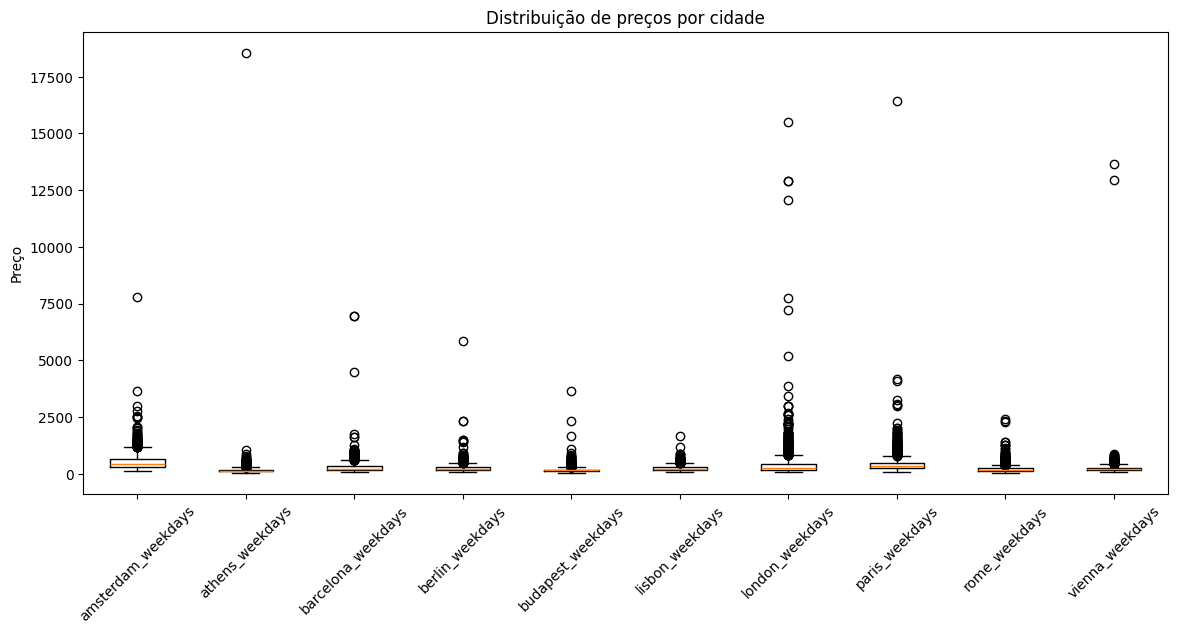

In [117]:
plt.figure(figsize=(14,6))

plt.boxplot(
    dados_por_cidade,
    labels=cidades,
    showfliers=True 
)

plt.xticks(rotation=45)
plt.ylabel('Preço')
plt.title('Distribuição de preços por cidade')
plt.show()

In [134]:
cid_dia_sem_1q_3q_iqr

,Q1,Q3,IQR
origem,,,
amsterdam_weekdays,309.797764,657.324303,347.526539
athens_weekdays,99.594591,171.537037,71.942446
barcelona_weekdays,161.984779,335.373659,173.388880
berlin_weekdays,143.731887,277.005235,133.273348
budapest_weekdays,122.432674,184.941486,62.508812
lisbon_weekdays,160.178236,284.005629,123.827392
london_weekdays,167.454550,435.452386,267.997836
paris_weekdays,240.003728,463.463510,223.459782
rome_weekdays,136.067145,235.195100,99.127955


Conclusão